In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED=False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../py")
import folderparser as fp
import folderscraper as fs
import interfacemetrics as intm
from interfacePlots import *
from config import cfg
LOGGERDEFINED = fp.openLog('interfacemetrics_viscsweep.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=True)

In [3]:
# source folder where all sim data is stored
EFOLDERS = [os.path.join(cfg.path.server, 'viscositysweep', s) for s in ['HBnewtsweep', 'newtHBsweep', 'newtnewtsweep', 'HBHBsweep', 'NewtFine']]

# folder to export summary tables, figures 
EXPORTFOLDER = os.path.join(cfg.path.fig, 'viscositysweep', 'plots')

# Generating files

### make a legend of all of the mesh refinement sims

In [ ]:
import pandas as pd
o = []
for topfolder in [os.path.join(cfg.path.server, r'viscositysweep\archive\mesh refinement')]:
    for f in fp.caseFolders(topfolder):
        fs.populate(f)
        l = fp.legendUnique(f)
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.server, r'viscositysweep\archive\mesh refinement\legend_mesh.csv'))

### make a legend table of the newtFine folder

In [ ]:
import pandas as pd
o = []
for topfolder in [os.path.join(cfg.path.server, 'viscositysweep', 'NewtFine')]:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.path.fig, 'viscositysweep', 'legend_newtfine.csv'))

### make a legend of all simulations

In [ ]:
import pandas as pd
o = []
for topfolder in EFOLDERS:
    for f in os.listdir(topfolder):
        l = fp.legendUnique(os.path.join(topfolder, f))
        if len(l)>0:
            o.append(l)
p = pd.DataFrame(o)
p.to_csv(os.path.join(cfg.fig, 'viscositysweep', 'legend_general.csv'))

### summarize data in each folder

In [ ]:
for topfolder in [os.path.join(cfg.path.server, 'viscositysweep', 'NewtFine')]:
    for folder in fp.caseFolders(topfolder):
        intm.sumAndSteady(folder, False)

### summarize the pressure differentials for all simulations into a table

In [7]:
help(linePressures)

Help on function linePressures in module plot_line:

linePressures(topfolder: str, exportFolder: str, filename: str) -> dict
    find pressure differential between upstream and downstream surface of nozzle along the line traces for all sims in folder and export



In [ ]:
tt,u = linePressures(os.path.join(cfg.path.server, 'viscositysweep', 'newtnewtsweep'), os.path.join(cfg.path.fig, 'viscositysweep'), 'pressures.csv')

### summarize the data for all sims and put it into a single table

In [8]:
help(summaryTable)

Help on function summaryTable in module plot_metrics:

summaryTable(topfolders: str, time: float, xbehind: float, exportFolder: str, filename: str = 'summaryTable') -> Tuple[pandas.core.frame.DataFrame, dict]
    collect summary data for each topfolder and put it all into a table



In [ ]:
tt0,u0 = summaryTable(EFOLDERS, 2.5, 5, os.path.join(cfg.path.fig, 'viscositysweep'))

# Plots

In [9]:
help(metricPlots)

Help on function metricPlots in module plot_metrics:

metricPlots(topFolder: str, exportFolder: str, time: float, xbehind: float, label: str, overwrite: bool = False, **kwargs) -> None
    # metricPlots plots slice summaries as color density plots
    topFolder is a full path name to the folder containing all the simulations
    exportFolder is the folder to export plots to
    time is the time since extrusion started in s
    xbehind is the distance behind the center of the nozzle in mm
    label is the column label, e.g. 'maxz'



In [ ]:
fullv = [10**i for i in range(-2, 6)]
for TOPFOLDER in EFOLDERS:
        xposition = 5
        for t in [2.5]:
            for s in [['arean', 1.0, 1.8]]:
                metricPlots(TOPFOLDER, EXPORTFOLDER, t, xposition, s[0], xvar='nuink', yvar='nusup', split=True, sigmalist=[0,40], overwrite=True, nuinklist=fullv, nusuplist=fullv, adjustBounds=False, tmin=s[1], tmax=s[2])

In [10]:
help(steadyPlots)

Help on function steadyPlots in module plot_steady:

steadyPlots(topFolder: str, imsize: int, exportFolder: str, sigmalist: List[float], overwrite: bool = False, **kwargs) -> None
    steadyPlots plots all of the folders on one grid of plots, where color depends on surface tension
    topFolder is the full path name to the folder that holds all of the folders
    imsize is the size of each plot
    exportFolder is the folder to export the plot to
    sigmalist is a list of sigma values to include. This is most legible with only one sigma value.



In [ ]:
fullv = [10**i for i in range(-2, 6)]
for TOPFOLDER in EFOLDERS:
        for sigma in [0, 40]:
            imsize=1
            steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar='nuink', yvar='nusup', overwrite=True, nuinklist=fullv, nusuplist=fullv, adjustBounds=False)

In [11]:
help(picPlots0)

Help on function picPlots0 in module plot_pic:

picPlots0(topFolder: str, exportFolder: str, time: float, sigma: float, tag: str = 'y_umag', overwrite: bool = False, imsize: float = 6.5, **kwargs) -> None
    plot all pictures for simulations in a folder, but use automatic settings for cropping and spacing and export the result
    topFolder is the folder that holds the simulations
    exportFolder is the folder to export the images to
    time is the time in s since flow started
    sigma is the surface tension
    tag is the name of the image type, e.g. 'y_umag'. Used to find images.
    other kwargs can be used to style the plot



In [ ]:
for s in ['newtnewtsweep', 'controls']:
    TOPFOLDER = os.path.join(cfg.path.server, 'viscositysweep', s)
    xvar = 'nuink'
    yvar = 'nusup'
    fullv = [10**i for i in range(1, 6)]
    t = 2.5
    sigma = 0
    suplist = [10**3]
    for ta in ['y_py', 'x_uslicex', 'y_umag', 'y_uzslicey']:
        picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=False, nuinklist=fullv, nusuplist=suplist, adjustBounds=False)

In [12]:
for s in ['newtnewtsweep']:
    TOPFOLDER = os.path.join(cfg.path.server, 'viscositysweep', s)
    xvar = 'nuink'
    yvar = 'nusup'
    t = 2.5
    cropx = 300/1216
    cropy = 300/1216
    crops = {'cropxl':150/1216, 'cropxr':1-450/1216, 'cropyb':1-cropy, 'cropyt':cropy}
    picPlots0(TOPFOLDER, EXPORTFOLDER, t, 0, tag='y_umag', xvar=xvar, yvar=yvar, crops=crops, overwrite=True)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\newtnewtsweep\pics_y_umag_t2.5_sigma_0_newtnewtsweep_xvar_nuink_yvar_nusup


In [6]:
for s in ['newtnewtsweep']:
    TOPFOLDER = os.path.join(cfg.path.server, 'viscositysweep', s)
    xvar = 'nuink'
    yvar = 'nusup'
    t = 1
    cropx = 100/1216
    cropy = 400/1216
    crops = {'cropxl':cropx, 'cropxr':1-cropx, 'cropyb':1-cropy, 'cropyt':cropy}
    picPlots0(TOPFOLDER, EXPORTFOLDER, t, 40, tag='y_umag', xvar=xvar, yvar=yvar, crops=crops, overwrite=True, imsize=12)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\newtnewtsweep\pics_y_umag_t1_sigma_40_newtnewtsweep_xvar_nuink_yvar_nusup


In [ ]:
for s in ['newtnewtsweep']:
    TOPFOLDER = os.path.join(cfg.path.server, 'viscositysweep', s)
    xvar = 'nuink/nusup'
    yvar = '1/nusup'
    t = 1
    sigma = 0
    for ta in ['y_umag']:
        picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=True, adjustBounds=True)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/openfoam/summaries\viscositysweep\plots\newtnewtsweep\xs_8nozzle_inner_width_t_2.5_newtnewtsweep_cvar_sigma_xvar_nuink_yvar_nusup_sigma_list_0-40_color_list_#3b4cc0-#ee8468


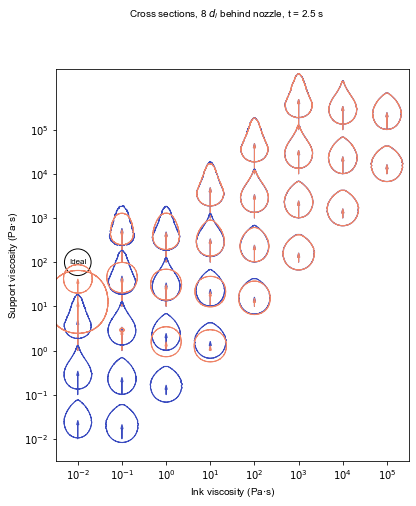

In [12]:
fullv = [10**i for i in range(-2, 6)]
TOPFOLDER = EFOLDERS[2]
fig = XSPlots0(TOPFOLDER, EXPORTFOLDER, 2.5, 8
         , xunits='nozzle_inner_width', 
         cvar='sigma', xvar='nuink', yvar='nusup', sigma_list=[0,40], color_list=['#3b4cc0', '#ee8468'])

In [ ]:
fullv = [10**i for i in range(-2, 6)]

xvar = 'nuink'
yvar = 'nusup'

for TOPFOLDER in [EFOLDERS[0]]:
    txtPlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    timePlots(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    runtimePlots0(TOPFOLDER, EXPORTFOLDER, xvar=xvar, yvar=yvar, overwrite=False)
    
    xposition = 5
    for t in [2.5]:
        for s in [['arean', 0.7, 1.8], ['vertdispn', 0, 1], ['aspectratio', 0.6, 1.7], ['speeddecay', 0.5, 1.0]]:
            metricPlots(TOPFOLDER, EXPORTFOLDER, t, xposition, s[0], xvar=xvar, yvar=yvar, split=True,\
                        sigmalist=[0,40], overwrite=False, nuinklist=fullv, nusuplist=fullv, \
                        adjustBounds=False, tmin=s[1], tmax=s[2])
    for t in [0.5, 1, 2.5]:
        for sigma in [0, 40]:
            for ta in ['y_umag', 'y_viscy', 'y_uslicey', 'x_uslicex', 'x_viscx']:
                picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=False,\
                          nuinklist=fullv, nusuplist=fullv, adjustBounds=False)
    for t in [2.5]:
        XSPlots0(TOPFOLDER, EXPORTFOLDER, t, xposition, [0, 40], xvar=xvar, yvar=yvar, overwrite=False,\
                 nuinklist=fullv, nusuplist=fullv, adjustBounds=False)
    for sigma in [0, 40]:
        imsize=1.3
        steadyPlots(TOPFOLDER, imsize, EXPORTFOLDER, [sigma], xvar=xvar, yvar=yvar, overwrite=False, \
                    nuinklist=fullv, nusuplist=fullv, adjustBounds=False)

In [ ]:
fullv = [10**i for i in range(-2, 6)]

xvar = 'nuink'
yvar = 'nusup'

for TOPFOLDER in EFOLDERS:
    for t in range(0,26):
        t = round(t/10, 1)
        for sigma in [0, 40]:
            for ta in ['y_umag']:
                picPlots0(TOPFOLDER, EXPORTFOLDER, t, sigma, tag=ta, xvar=xvar, yvar=yvar, overwrite=False, nuinklist=fullv, nusuplist=fullv, adjustBounds=False, svg=False)

### line trace plots

In [ ]:
for mode in [0,1]:
    flist = []
    for f in [533, 37, 45, 53]:
        flist.append(os.path.join(EFOLDERS[2], 'nb'+str(f)))
    fig = linePlots(flist, intmp.divfunc, 1, 2.25, mode)
        fig.savefig(os.path.join(EXPORTFOLDER, f'newtnewt_velz_t_1_x_1.5_div_sup100_sig_0_{mode}.svg'))

In [ ]:
for mode in [0,1]:
    flist = []
    for f in [247, 241, 253]:
        flist.append(os.path.join(EFOLDERS[0], 'nb'+str(f)))
    fig = linePlots(flist, intmp.inkfunc, 1, 2.25, mode)
    fig.savefig(os.path.join(EXPORTFOLDER, f'HBnewt_velz_t_1_x_1.5_inkv_sup100_sig_0_{mode}.svg'))

In [ ]:
for mode in [0,1]:
    flist = []
    for f in [221, 227, 709]:
        flist.append(os.path.join(EFOLDERS[1], 'nb'+str(f)))
    fig = linePlots(flist, intmp.supfunc, 1, 2.25, mode)
    fig.savefig(os.path.join(EXPORTFOLDER, f'newtHB_velz_t_1_x_1.5_supv_ink10_sig_0_{mode}.svg'))

In [ ]:
flist = []
#for f in [32, 42, 52, 62]:
for f in [40,50,60]:
    flist.append(os.path.join(TOPFOLDER, 'nb'+str(f)))
fig = lineplots(flist, intmp.supfunc, 5, 2.25)
fig.savefig(os.path.join(EXPORTFOLDER, 'velz_t_5_sup_div0.1_sig_40.svg'))


In [ ]:
flist = []
for f in [22, 40, 41]:
    flist.append(os.path.join(TOPFOLDER, 'nb'+str(f)))
fig = linePlots(flist, intmp.sigfunc, 5, 2.25)
fig.saveFig(os.path.join(EXPORTFOLDER, 'velz_t_5_sig_div0.1_sup_1.svg'))

### stability/steady state plots

In [ ]:
# flist = []
# for f in [50, 42, 62]:
#     flist.append(os.path.join(TOPFOLDER, 'nb'+str(f)))
flist = [os.path.join(EFOLDERS[2], 'nb37'), os.path.join(EFOLDERS[0], 'nb247')]
for f in flist:
    stabilityPlot(f, EXPORTFOLDER, 2.5, 3, export=True)

In [ ]:
stabilityPlot(os.path.join(EFOLDERS[2], 'nb37'), EXPORTFOLDER, 2.5, 3, export=True)

### plot correlations between dependent variables

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3,sharex='col', sharey='row',figsize=(6.5,6.5))
cmap = plt.get_cmap('tab20c')

for t in range(len(EFOLDERS)):
    TOPFOLDER = EFOLDERS[t]
    metrics = []
    for f in os.listdir(TOPFOLDER):
        try:
            m = metricVals(os.path.join(TOPFOLDER, f), 2.5, 5, ['arean', 'vertdispn', 'aspectratio', 'speeddecay'])
        except:
            pass
        else:
            metrics.append(m)
    df = pd.DataFrame(metrics)

    df2 = df[df['arean']<3]
    df2 = df2[df2['vertdispn']>-0.1]
    df2 = df2[df2['vertdispn']<1.2]
    df2 = df2[df2['speeddecay']<1.1]

    slist = df.keys()
    for i in range(4):
        for j in range(i):
            color = cmap(t/3)
            if j==0 and i==1:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color, label=os.path.basename(TOPFOLDER))
            else:
                axs[j,i-1].scatter(df2[slist[i]], df2[slist[j]], s=5, color=color)
            axs[j,i-1].set_xlabel(slist[i])
            axs[j,i-1].set_ylabel(slist[j])
axs[0,0].legend()


In [ ]:
intm.exportIm(os.path.join(EXPORTFOLDER, 'correlations'), fig)

### plot pressure differential as a function of reynolds number

In [ ]:
d = pd.read_csv(os.path.join(cfg.path.fig, 'viscositysweep', 'pressures.csv'),index_col=0, skiprows=[1])
u = pd.read_csv(os.path.join(cfg.path.fig, 'viscositysweep', 'pressures.csv'), nrows=1)

In [ ]:
d.sort_values(by='nusup', inplace=True)
d['sup_Re'] = (1000*0.01*0.000907)/d['nusup']
fig,ax = plt.subplots(1,1)
d3 = d[d.dP>0]
supre = d3.sup_Re.unique()
p = [d3[d3.sup_Re==s].dP.mean() for s in supre]
err = [d3[d3.sup_Re==s].dP.sem() for s in supre]
coeffs = np.polyfit([np.log10(x) for x in supre], [np.log10(x) for x in p], 1)
x = [10**i for i in range(-7,1)]
ax.plot(x, [10**coeffs[1]*xi**coeffs[0] for xi in x], color='black')
ax.errorbar(supre, p, yerr=err, color='black', linestyle='None', fmt='o')
# ax.scatter(supre, p, color='black', linestyle='None')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-1, 10**7)
ax.set_xlabel('Support Reynolds number')
ax.set_ylabel('Pressure differential (Pa)')
ax.set_aspect('equal', adjustable='box')
ax.set_title('dP = {:0.2f}Re^{:0.2f} (Pa)'.format(10**coeffs[1], coeffs[0]))
intm.exportIm(os.path.join(cfg.path.fig, 'viscositysweep', 'plots', 'newtnewtsweep', 'pressure'), fig)

In [ ]:
d['sup_Re'] = (0.01*0.000907)/d['nusup']
fig,ax = plt.subplots(1,1)
d2 = d[d.dP<0]
supre = d2.sup_Re.unique()
p = [-d2[d2.sup_Re==s].dP.mean() for s in supre]
err = [d2[d2.sup_Re==s].dP.sem() for s in supre]
ax.errorbar(supre, p, yerr=err, color='black', linestyle='None', fmt='o')
# ax.scatter(supre, p, color='black', linestyle='None')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(10**-1, 10**7)
ax.set_xlabel('Support Reynolds number')
ax.set_ylabel('Pressure differential (Pa)')
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')